In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#import grapm grom GrandGraph.gpickle
G = nx.read_gpickle("GrandGraph.gpickle")

In [3]:
# Degree of each node
degrees = G.degree()
#print("Degrees:", dict(degrees))

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness)

# Closeness Centrality
closeness = nx.closeness_centrality(G)
print("Closeness Centrality:", closeness)

# PageRank
pagerank = nx.pagerank(G)
print("PageRank:", pagerank)

# Clustering Coefficient for each node
clustering = nx.clustering(G)
print("Clustering Coefficient:", clustering)

# Local Efficiency (using global efficiency of node-induced subgraphs)
local_efficiency = {}
for node in G:
    subgraph = nx.ego_graph(G, node)
    local_efficiency[node] = nx.global_efficiency(subgraph)
print("Local Efficiency:", local_efficiency)

# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
print("Eigenvector Centrality:", eigenvector)

Betweenness Centrality: {'4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:0': 0.02830383508975903, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2296': 0.0017608502352494588, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2297': 0.002109258102441082, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2312': 0.0033317933932363263, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2313': 0.0003170491685948087, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2314': 0.00331319254834835, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2318': 0.004078044371509474, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2330': 0.0013804292949530584, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2331': 0.0023438730901044263, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2338': 0.0007937739989257745, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2342': 0.000667700682753336, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2345': 0.002750764479842059, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2350': 0.001381754686818378, '4:8e958258-c2d0-4c3f-ad46-a4e2a42b65bf:2352': 0.001987517505404757, '4:8e958

KeyboardInterrupt: 

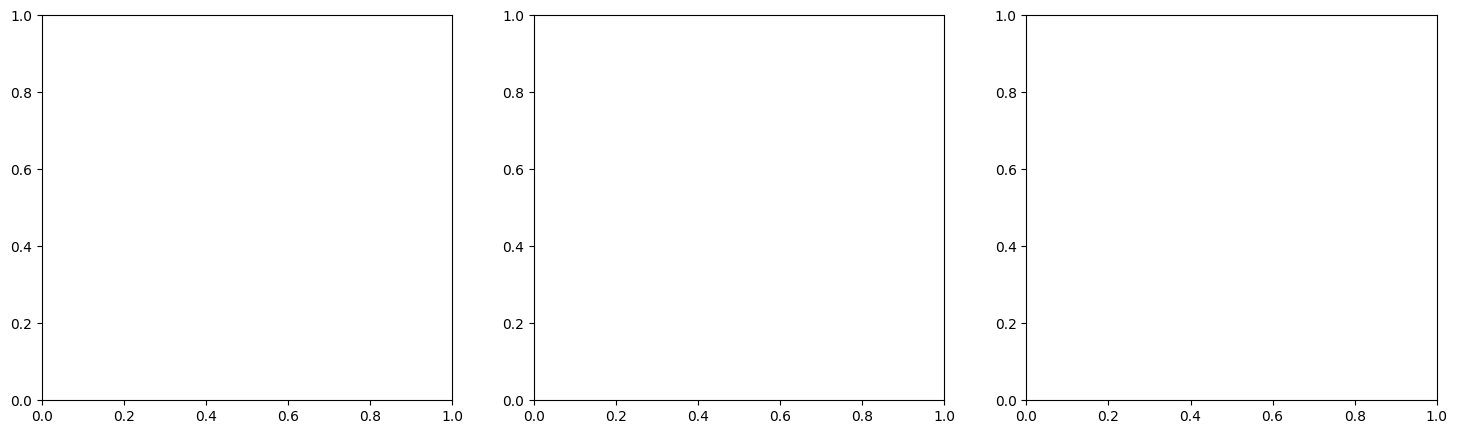

In [9]:
# Create DataFrame for analysis
centrality_measures = {
    'betweenness': betweenness,
    'closeness': closeness,
    'eigenvector': eigenvector
}
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:50]
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:50]

# Function to plot
def plot_centrality_subset(G, centrality, title):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)  # Position nodes
    # Draw all nodes
    nx.draw_networkx_nodes(G, pos, node_color='grey', alpha=0.4, node_size=20)
    # Draw top centrality nodes
    top_nodes = [node for node, _ in centrality]
    node_sizes = [centrality[node] * 50000 for node, _ in centrality]
    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_size=node_sizes, node_color=node_sizes, cmap=plt.cm.plasma)
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    plt.title(title)
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Centrality')
    plt.axis('off')
    plt.show()
plot_centrality_subset(G, dict(top_betweenness), 'Top Betweenness Centrality')
plot_centrality_subset(G, dict(top_closeness), 'Top Closeness Centrality')